# Tidyverse, an opinionated Data Science Toolbox in R from Hadley Wickham

This follows the tutorial [here](https://www.kdnuggets.com/2017/10/tidyverse-powerful-r-toolbox.html#.Wd1MXRDfGUc.gmail).
This is my first introduction to the tidyverse so we will see how it goes.

In [48]:
library(tidyverse)

## Get the data

The article just uses `titanic.csv`, so I've downloaded the train and test sets from [Kaggle](https://www.kaggle.com/c/titanic/data).

In [21]:
titanic <- read_csv('titanic_data/train.csv')

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


In [22]:
# Lets take a look at the data. It looks like there are some NA values...
head(titanic, 10)
print(nrow(titanic))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NA,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NA,C


[1] 891


## Remove NA values

It looks like this drops a lot of data but I suppose it doesn't matter for the purposes of this example.

In [23]:
# get rid of NA values using na.omit() and pipe %>% operator
titanic <- titanic %>% na.omit()

In [24]:
# take a look again
head(titanic, 10)
print(nrow(titanic))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65,0,1,113509,61.9792,B30,C


[1] 183


## Filter the data

1. Use select to drop columns "Name", "Ticket", and "Cabin"
2. Mutate the data to turn "Sex" into a binary [male=1, female=0]
3. Filter women under 25 that survived

In [30]:
# use dplyr to drop certain columns
titanic_filt <- titanic %>% select(-Name, -Ticket, -Cabin)

In [31]:
head(titanic_filt)

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,1,female,38,1,0,71.2833,C
4,1,1,female,35,1,0,53.1000,S
7,0,1,male,54,0,0,51.8625,S
11,1,3,female,4,1,1,16.7000,S
12,1,1,female,58,0,0,26.5500,S
22,1,2,male,34,0,0,13.0000,S


In [33]:
titanic_filt <- titanic_filt %>% mutate(Sex = if_else(Sex == 'male', 1, 0))

In [34]:
head(titanic_filt)

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,1,0,38,1,0,71.2833,C
4,1,1,0,35,1,0,53.1000,S
7,0,1,1,54,0,0,51.8625,S
11,1,3,0,4,1,1,16.7000,S
12,1,1,0,58,0,0,26.5500,S
22,1,2,1,34,0,0,13.0000,S


In [37]:
titanic_filt <- titanic_filt %>% filter(Age<25, Sex==0, Survived==1)

In [38]:
head(titanic_filt)

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
11,1,3,0,4,1,1,16.7000,S
89,1,1,0,23,3,2,263.0000,S
137,1,1,0,19,0,2,26.2833,S
152,1,1,0,22,1,0,66.6000,S
292,1,1,0,19,1,0,91.0792,C
308,1,1,0,17,1,0,108.9000,C


## Summarize and plot

1. Summarize the mean fare grouped by Passenger class and plot
2. plot histogram of ages
3. plot histogram of fares

In [39]:
help(summarise)

In [40]:
fare <- titanic_filt %>% group_by(Pclass) %>% summarise(mean_fare=mean(Fare))

In [43]:
head(fare)

Pclass,mean_fare
1,112.80000
2,21.93057
3,16.70000


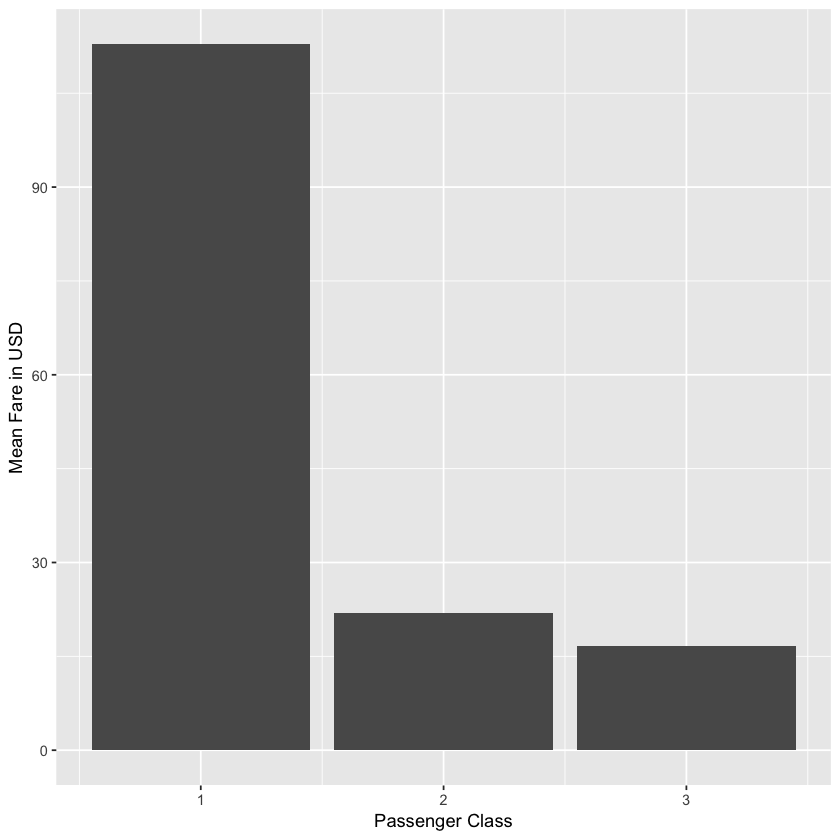

In [52]:
# plot mean fare as a function of class (there is a typo in the tutorial df should be fare not mean_fare)
ggplot(fare, aes(x = Pclass, y = mean_fare)) + 
    geom_bar(stat = 'identity') + 
    xlab('Passenger Class') + 
    ylab('Mean Fare in USD')

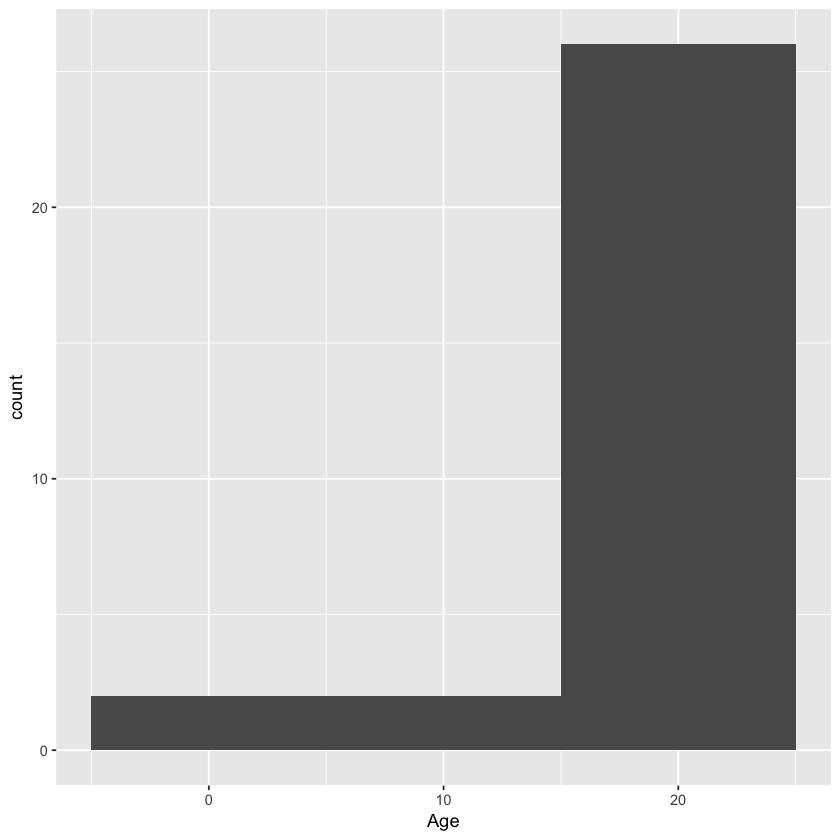

In [56]:
#Plot a histogram of the Ages
ggplot(titanic_filt, aes(x = Age)) + geom_histogram(binwidth = 10)

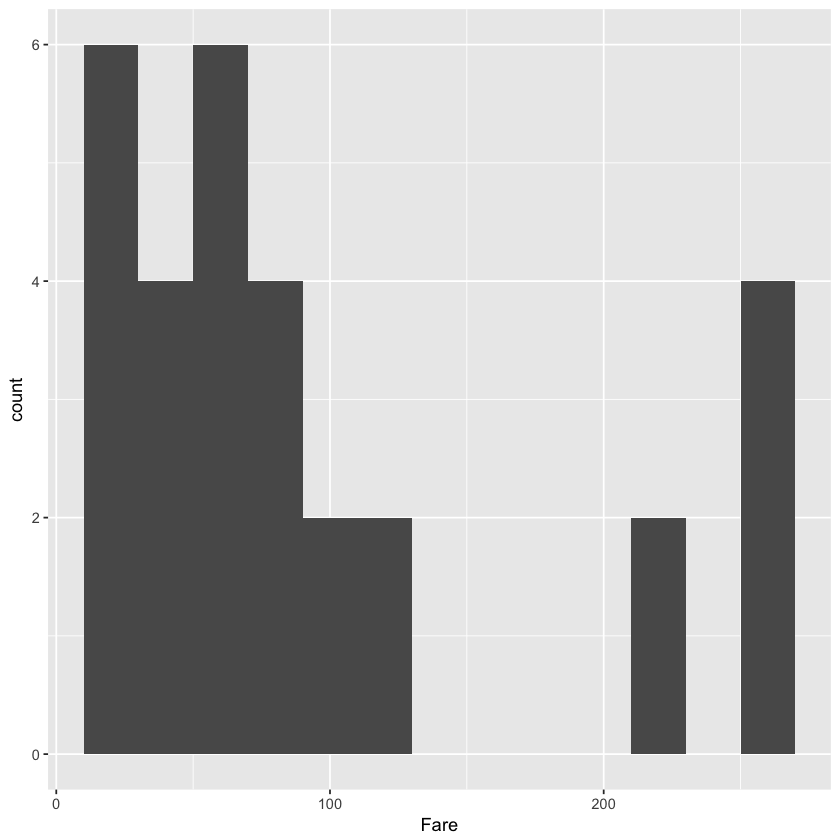

In [57]:
# histogram of fares
ggplot(titanic_filt, aes(x = Fare)) + geom_histogram(binwidth = 20)

## Finish cleaning and preparing the data for the logistic regression.

For filtering we are:

1. basically doing a one-hot encoding on the Embarked port (there has to be a better way to do this)
2. Ascribing a boolean variable to tell if fare is > the mean fare or not
3. Ascribing a boolean variable to tell if the age is < median age or not
4. dropping the remaing columns of "PassengerId", "Embarked" and "SibSp"

In [58]:
titanic_final <- titanic_filt %>% 
  mutate(port_S = if_else(Embarked == 'S', 1, 0),
         port_C = if_else(Embarked == 'C', 1, 0),
         port_Q = if_else(Embarked == 'Q', 1, 0),
         Fare = if_else(Fare > mean(Fare), 1, 0),
         Age = if_else(Age < median(Age), 1, 0)) %>% 
  select(-PassengerId, -Embarked, -SibSp)

In [59]:
head(titanic_final)

Survived,Pclass,Sex,Age,Parch,Fare,port_S,port_C,port_Q
1,3,0,1,1,0,1,0,0
1,1,0,0,2,1,1,0,0
1,1,0,1,2,0,1,0,0
1,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,1,0
1,1,0,1,0,1,0,1,0


In [60]:
# Use purrr's map() and map_df() function to apply a logistic regression 
# by splitting the data by Passenegr class and iterating the function over each group.
titanic_final %>%
  split(.$Pclass) %>%
  map(~ glm(Survived ~ . -Pclass, #ignore Pclass column
            family = binomial(link = 'logit'), data = .x)) %>%
  map_df(~ as.data.frame(t(as.matrix(coef(.)))))

(Intercept),Sex,Age,Parch,Fare,port_S,port_C,port_Q
25.56607,NA,-1.000768e-09,1.455821e-11,-2.522806e-09,9.398427e-12,NA,NA
23.56607,NA,3.142001e-10,NA,NA,-3.142001e-10,NA,NA
23.56607,NA,-1.175864e-10,NA,NA,NA,NA,NA


## Final thoughts

This tutorial was actually pretty terrible. I imagine that for someone that already knows about the `tidyverse` it is overly simplistic and for someone new like me it is basically worthless because it barely describes any of the functions. I guess I already did most of it now but I will definitely need to find some better material to learn more about the tidyverse